In [144]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
indian_cities = {
    # North India
    "Delhi": (28.6139, 77.2090),
    "Chandigarh": (30.7333, 76.7794),
    "Jaipur": (26.9124, 75.7873),
    "Lucknow": (26.8467, 80.9462),
    "Kanpur": (26.4499, 80.3319),
    "Varanasi": (25.3176, 82.9739),


    # West India
    "Mumbai": (19.0760, 72.8777),
    "Pune": (18.5204, 73.8567),
    "Ahmedabad": (23.0225, 72.5714),
    "Surat": (21.1702, 72.8311),
    "Bhopal": (23.2599, 77.4126),
    "Nagpur": (21.1458, 79.0882),

    # South India
    "Bengaluru": (12.9716, 77.5946),
    "Chennai": (13.0827, 80.2707),
    "Hyderabad": (17.3850, 78.4867),
    "Kochi": (9.9312, 76.2673),
    "Thiruvananthapuram": (8.5241, 76.9366),
    "Visakhapatnam": (17.6868, 83.2185),

    # East India
    "Kolkata": (22.5726, 88.3639),
    "Bhubaneswar": (20.2961, 85.8245),


}


In [137]:
# Setting up the dataset

def get_city_monthly(city, lat, lon):
    url = "https://air-quality-api.open-meteo.com/v1/air-quality"
    params = {
        "latitude": lat,
        "longitude": lon,
        "hourly": [
            "pm2_5",
            "pm10",
            "ozone",
            "nitrogen_dioxide",
            "sulphur_dioxide",
            "carbon_monoxide"
        ],
        "start_date": "2024-01-01",
        "end_date": "2025-12-01"
    }

    data = requests.get(url, params=params).json()

    # DataFrame from API data
    if "hourly" not in data:
        print(f"No hourly data for {city}")
        return pd.DataFrame()

    hourly = data["hourly"]
    df = pd.DataFrame(hourly)

    # Convert time to datetime
    df["time"] = pd.to_datetime(df["time"])
    df.set_index("time", inplace=True)

    # Monthly averages (FIX)
    monthly = df.resample("M").mean()


    # Add city + lat/lon columns
    monthly["city"] = city
    monthly["latitude"] = lat
    monthly["longitude"] = lon

    # Restore time column
    monthly["time"] = monthly.index

    return monthly.reset_index(drop=True)


In [138]:
# Combine monthly data for all cities
all_cities_df = pd.DataFrame()

for city, (lat, lon) in indian_cities.items():
    print(f"Processing {city}...")
    monthly_df = get_city_monthly(city, lat, lon)
    all_cities_df = pd.concat([all_cities_df, monthly_df], ignore_index=True)

Processing Delhi...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Chandigarh...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Jaipur...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Lucknow...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Kanpur...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Varanasi...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Mumbai...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Pune...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Ahmedabad...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Surat...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Bhopal...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Nagpur...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Bengaluru...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Chennai...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Hyderabad...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Kochi...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Thiruvananthapuram...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Visakhapatnam...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Kolkata...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


Processing Bhubaneswar...


/tmp/ipython-input-1032060511.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").mean()


In [139]:
all_cities_df.shape

(480, 10)

In [140]:
all_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pm2_5             480 non-null    float64       
 1   pm10              480 non-null    float64       
 2   ozone             480 non-null    float64       
 3   nitrogen_dioxide  480 non-null    float64       
 4   sulphur_dioxide   480 non-null    float64       
 5   carbon_monoxide   480 non-null    float64       
 6   city              480 non-null    object        
 7   latitude          480 non-null    float64       
 8   longitude         480 non-null    float64       
 9   time              480 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 37.6+ KB


In [141]:
all_cities_df.columns

Index(['pm2_5', 'pm10', 'ozone', 'nitrogen_dioxide', 'sulphur_dioxide',
       'carbon_monoxide', 'city', 'latitude', 'longitude', 'time'],
      dtype='object')

In [142]:
all_cities_df.isnull().sum()

,0
pm2_5,0
pm10,0
ozone,0
nitrogen_dioxide,0
sulphur_dioxide,0
carbon_monoxide,0
city,0
latitude,0
longitude,0
time,0


In [143]:
all_cities_df.describe()

,pm2_5,pm10,ozone,nitrogen_dioxide,sulphur_dioxide,carbon_monoxide,latitude,longitude,time
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480
mean,37.331017,59.172932,84.323866,15.641696,16.038286,450.792144,20.675935,78.481410,2025-01-14 09:00:00
min,3.658602,6.907661,27.793011,2.138889,1.017639,103.455645,8.524100,72.571400,2024-01-31 00:00:00
25%,21.238071,32.384549,69.492005,9.545901,6.982163,289.716062,17.611350,76.147300,2024-07-23 06:00:00
50%,31.110556,45.397153,85.163978,13.449126,10.957997,399.839382,21.158000,77.503600,2025-01-15 12:00:00
75%,46.928825,69.769618,98.948768,19.834241,19.819456,532.624328,25.600675,80.485475,2025-07-07 18:00:00
max,136.558065,371.583602,163.494444,62.637500,82.173790,1739.159946,30.733300,88.363900,2025-12-31 00:00:00
std,23.079867,46.767306,22.896183,9.291872,14.455620,247.983115,6.004212,4.175153,NaN


In [146]:
# PM2.5-Based Air Quality Visualization

center_lat = all_cities_df["latitude"].mean()
center_lon = all_cities_df["longitude"].mean()

# Create AQI-like value (if not present)
if "aqi_like" not in all_cities_df:
    all_cities_df["aqi_like"] = all_cities_df["pm2_5"]  # or your formula

heat_df = all_cities_df[["latitude", "longitude", "aqi_like"]].dropna()

m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

HeatMap(
    heat_df.values.tolist(),
    radius=18,
    blur=15
).add_to(m)

m


In [ ]:
# Geographic Distribution of Air Pollution

all_cities_df["pollution_index"] = (
    all_cities_df["pm2_5"]*0.6 +
    all_cities_df["pm10"]*0.4
)

heat_df = all_cities_df[["latitude", "longitude", "pollution_index"]].dropna()

m = folium.Map(
    location=[all_cities_df.latitude.mean(), all_cities_df.longitude.mean()],
    zoom_start=5,
    tiles="CartoDB dark_matter"
)

HeatMap(
    data=heat_df.values.tolist(),
    radius=15,
    blur=20,
    min_opacity=0.5
).add_to(m)

m


In [ ]:
# Most recent PM2.5 reading for each city

m2 = folium.Map(
    location=[all_cities_df.latitude.mean(), all_cities_df.longitude.mean()],
    zoom_start=5,
    tiles="CartoDB positron"
)

latest = all_cities_df.groupby("city").tail(1)

for _, row in latest.iterrows():
    folium.CircleMarker(
        location=[row.latitude, row.longitude],
        radius=10,
        popup=f"{row.city} — PM2.5: {row.pm2_5:.2f}",
        color="red" if row.pm2_5 > 90 else "orange" if row.pm2_5 > 60 else "green",
        fill=True,
        fill_opacity=0.7
    ).add_to(m2)

m2


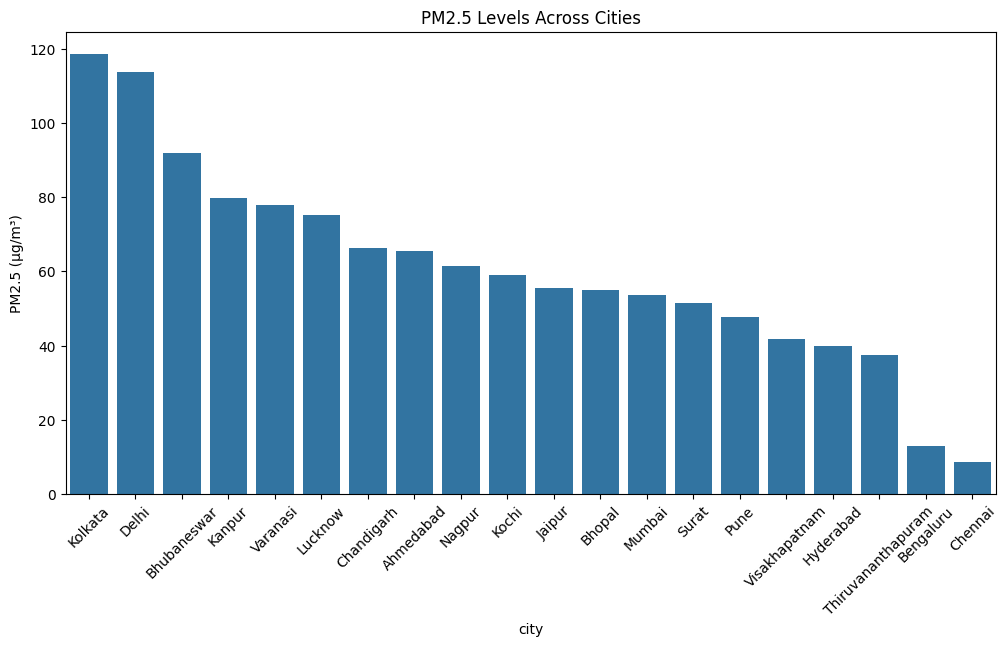

In [ ]:
# Latest PM2.5 Levels Across Indian Cities

latest = all_cities_df.groupby("city").tail(1).sort_values("pm2_5", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=latest, x="city", y="pm2_5")
plt.xticks(rotation=45)
plt.title("PM2.5 Levels Across Cities")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


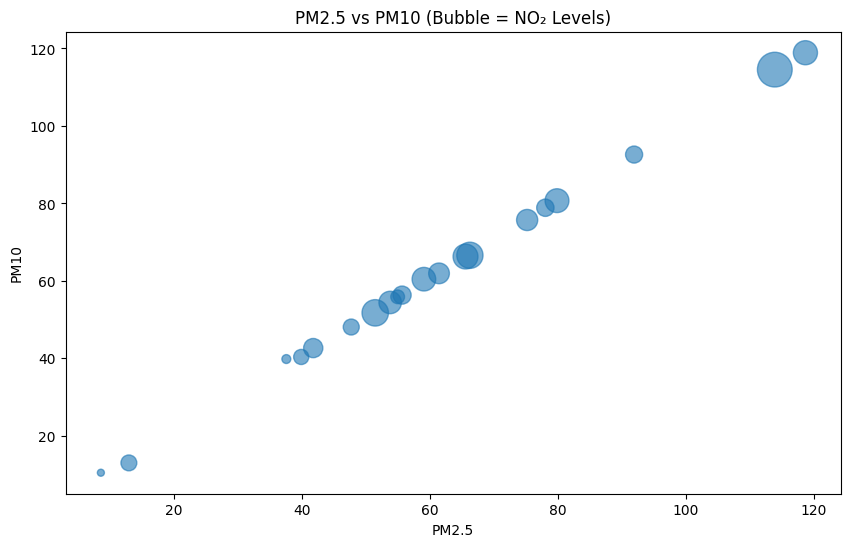

In [ ]:
# PM2.5 vs PM10 with Bubble Size Representing NO₂ Levels

plt.figure(figsize=(10,6))
plt.scatter(
    latest['pm2_5'],
    latest['pm10'],
    s=latest['nitrogen_dioxide']*10,
    alpha=0.6
)

plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.title("PM2.5 vs PM10 (Bubble = NO₂ Levels)")
plt.show()


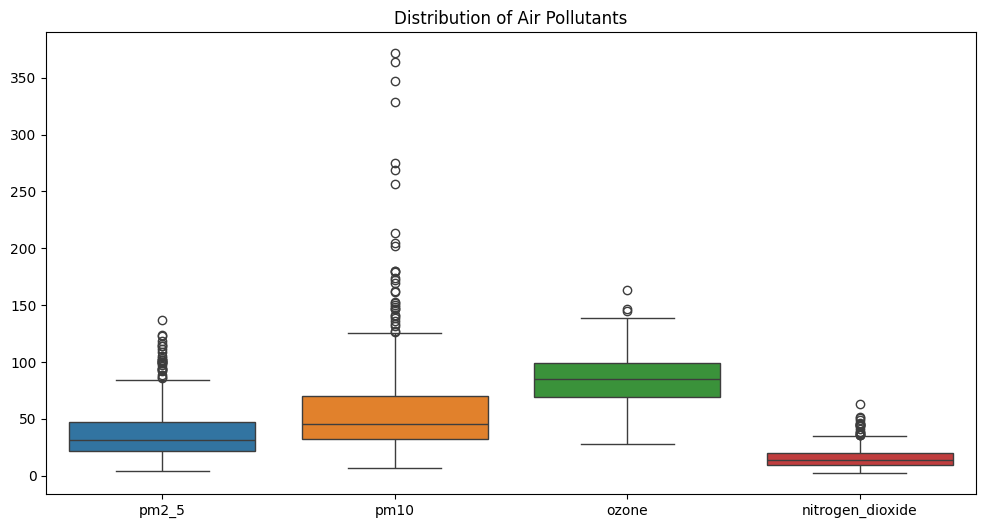

In [ ]:
# Distribution of Major Air Pollutants Across All Cities

plt.figure(figsize=(12,6))
sns.boxplot(data=all_cities_df[["pm2_5", "pm10", "ozone", "nitrogen_dioxide"]])
plt.title("Distribution of Air Pollutants")
plt.show()


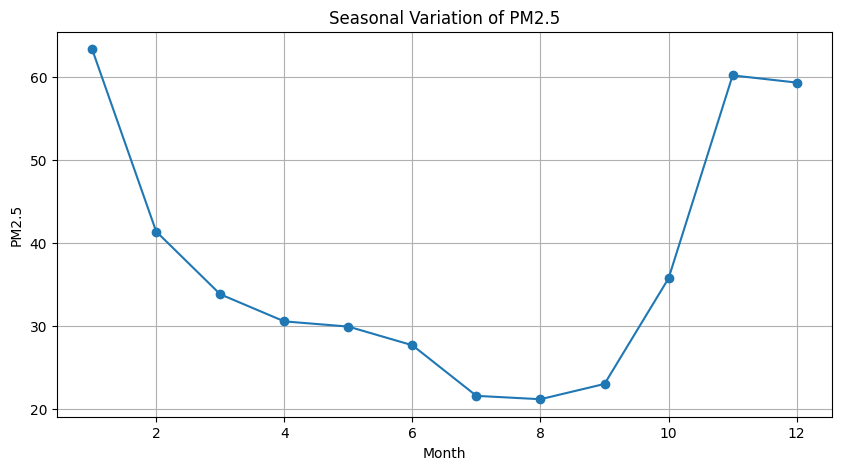

In [ ]:
# Seasonal Variation of PM2.5 Levels (Monthly Average)

all_cities_df['month'] = all_cities_df['time'].dt.month
seasonal = all_cities_df.groupby('month')['pm2_5'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(seasonal.index, seasonal.values, marker='o')
plt.title("Seasonal Variation of PM2.5")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()


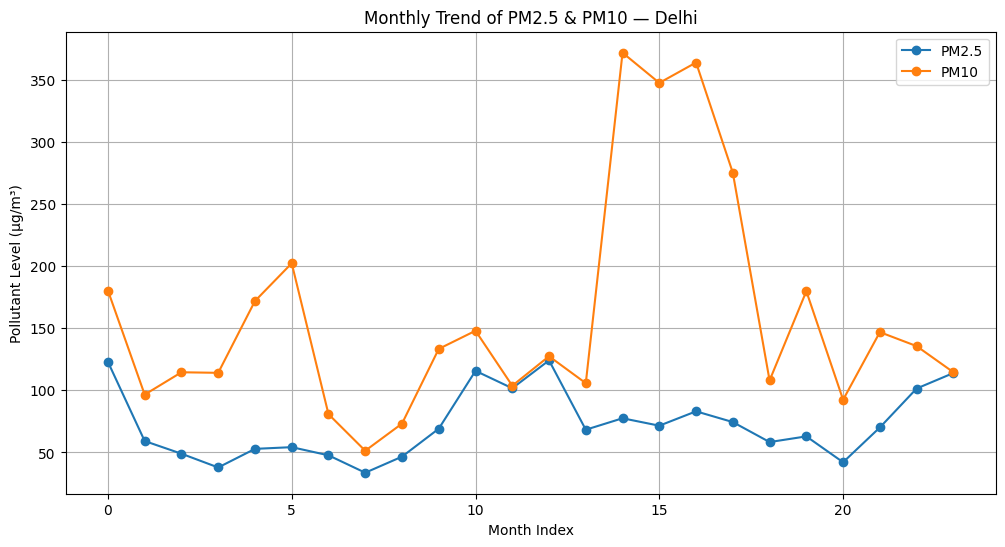

In [ ]:
# Monthly Trend of PM2.5 and PM10 for a Selected City

city = "Delhi"
df_city = all_cities_df[all_cities_df.city == city].copy()

# If you already have monthly averages, just plot numeric columns
plt.figure(figsize=(12,6))
plt.plot(df_city["pm2_5"], label="PM2.5", marker='o')
plt.plot(df_city["pm10"], label="PM10", marker='o')
plt.legend()
plt.title(f"Monthly Trend of PM2.5 & PM10 — {city}")
plt.xlabel("Month Index")
plt.ylabel("Pollutant Level (µg/m³)")
plt.grid(True)
plt.show()


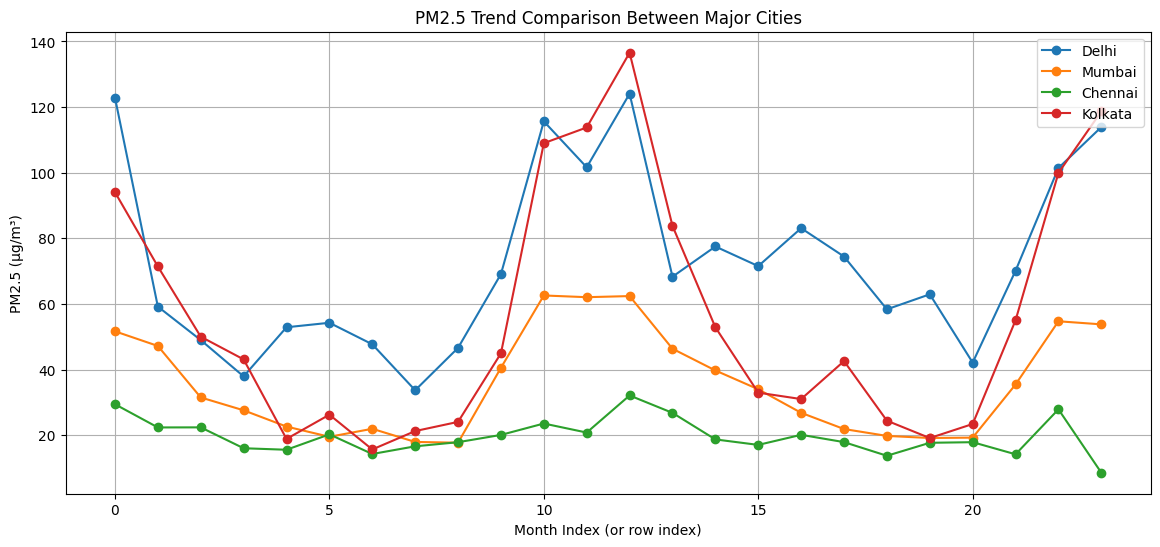

In [147]:
# PM2.5 Trend Comparison Across Major Indian Cities

cities = ["Delhi", "Mumbai", "Chennai", "Kolkata"]
plt.figure(figsize=(14,6))

for c in cities:
    df_city = all_cities_df[all_cities_df.city == c].copy()

    # Plot using row index as x-axis (since time does not exist)
    plt.plot(range(len(df_city)), df_city["pm2_5"], marker='o', label=c)

plt.legend()
plt.title("PM2.5 Trend Comparison Between Major Cities")
plt.xlabel("Month Index (or row index)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()


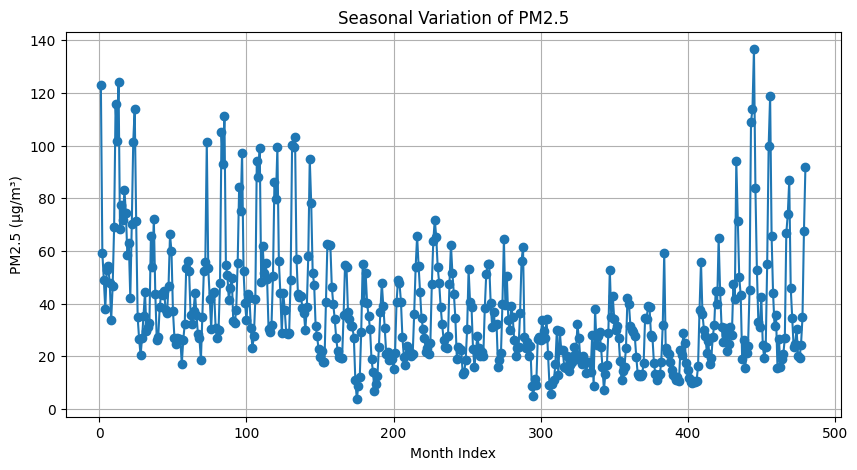

In [ ]:
# Seasonal Variation of PM2.5 (Using Numeric Month Index)

all_cities_df['month'] = range(1, len(all_cities_df)+1)  # simple numeric month index

# Group by month (or just use numeric index)
seasonal = all_cities_df.groupby('month')['pm2_5'].mean()

plt.figure(figsize=(10,5))
plt.plot(seasonal.index, seasonal.values, marker='o')
plt.title("Seasonal Variation of PM2.5")
plt.xlabel("Month Index")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()


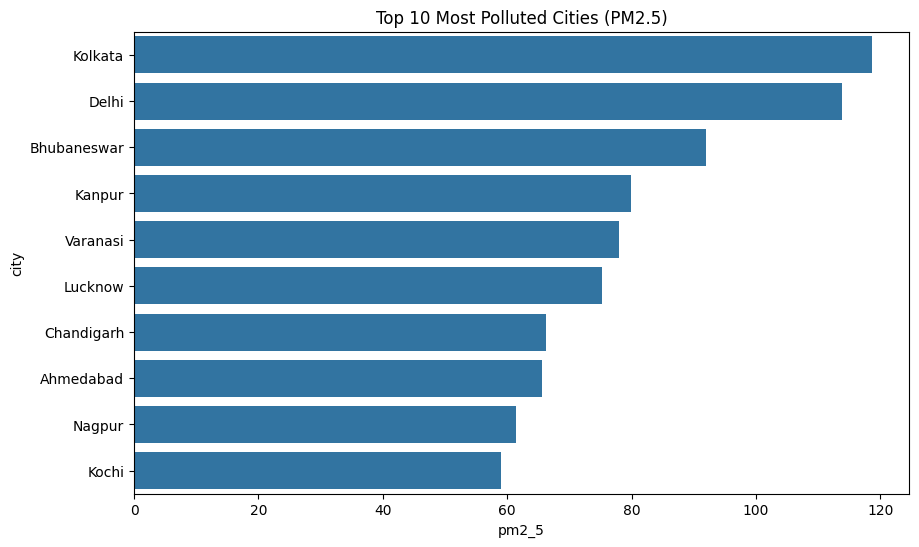

In [ ]:
# Top 10 Most Polluted Cities Based on PM2.5 Levels

top10 = latest.nlargest(10, "pm2_5")

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="pm2_5", y="city")
plt.title("Top 10 Most Polluted Cities (PM2.5)")
plt.show()


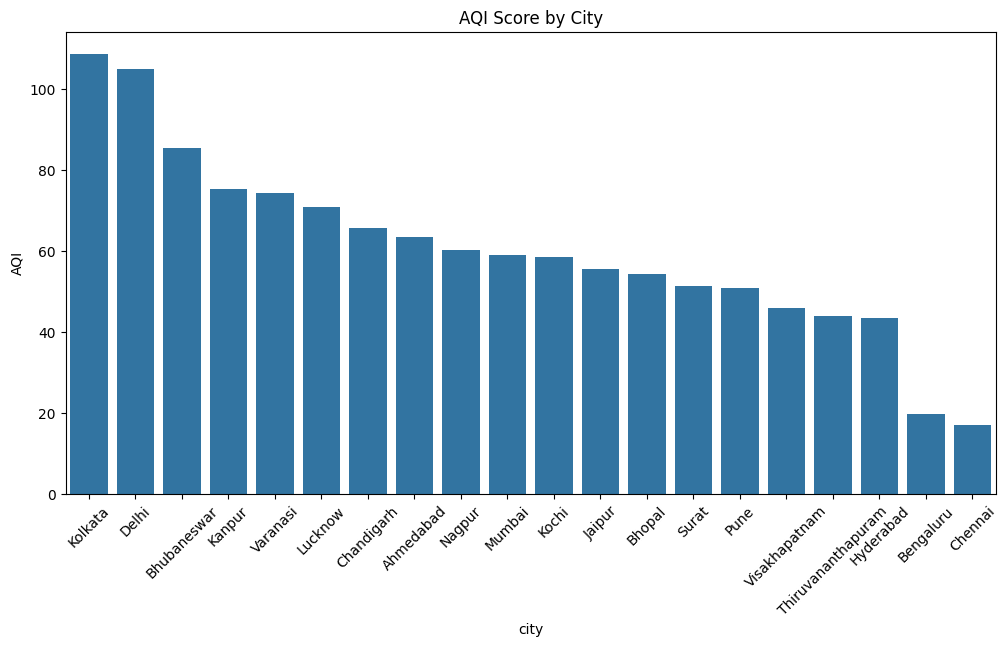

In [ ]:
# AQI Score by City (Custom Weighted AQI Formula)

all_cities_df["AQI"] = (
    all_cities_df["pm2_5"]*0.5 +
    all_cities_df["pm10"]*0.3 +
    all_cities_df["nitrogen_dioxide"]*0.1 +
    all_cities_df["ozone"]*0.1
)

aqi_latest = all_cities_df.groupby("city").tail(1)

plt.figure(figsize=(12,6))
sns.barplot(data=aqi_latest.sort_values("AQI", ascending=False),
            x="city", y="AQI")
plt.xticks(rotation=45)
plt.title("AQI Score by City")
plt.show()


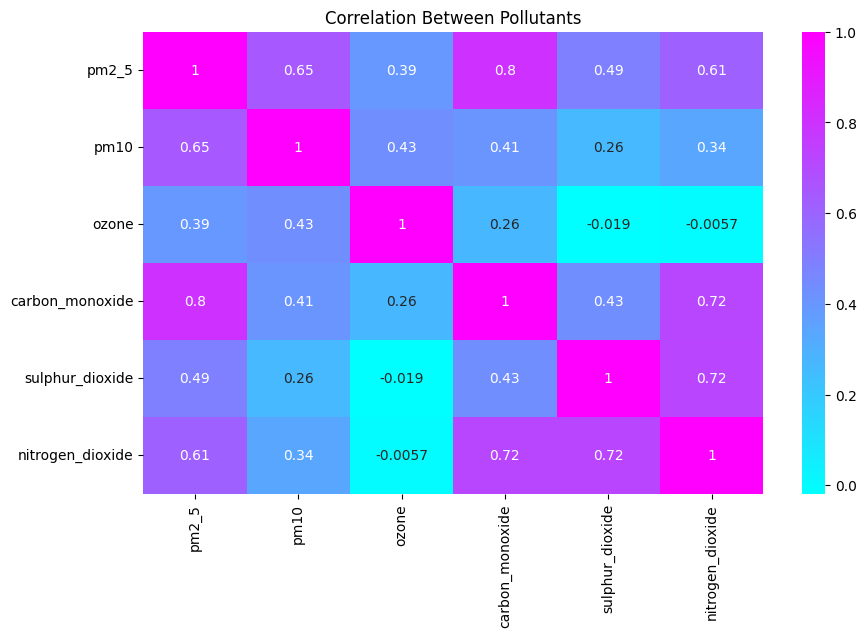

In [ ]:
# Correlation Between Major Air Pollutants

plt.figure(figsize=(10,6))
sns.heatmap(all_cities_df[["pm2_5","pm10","ozone","carbon_monoxide",
                           "sulphur_dioxide","nitrogen_dioxide"]]
            .corr(),
            annot=True, cmap="cool")
plt.title("Correlation Between Pollutants")
plt.show()


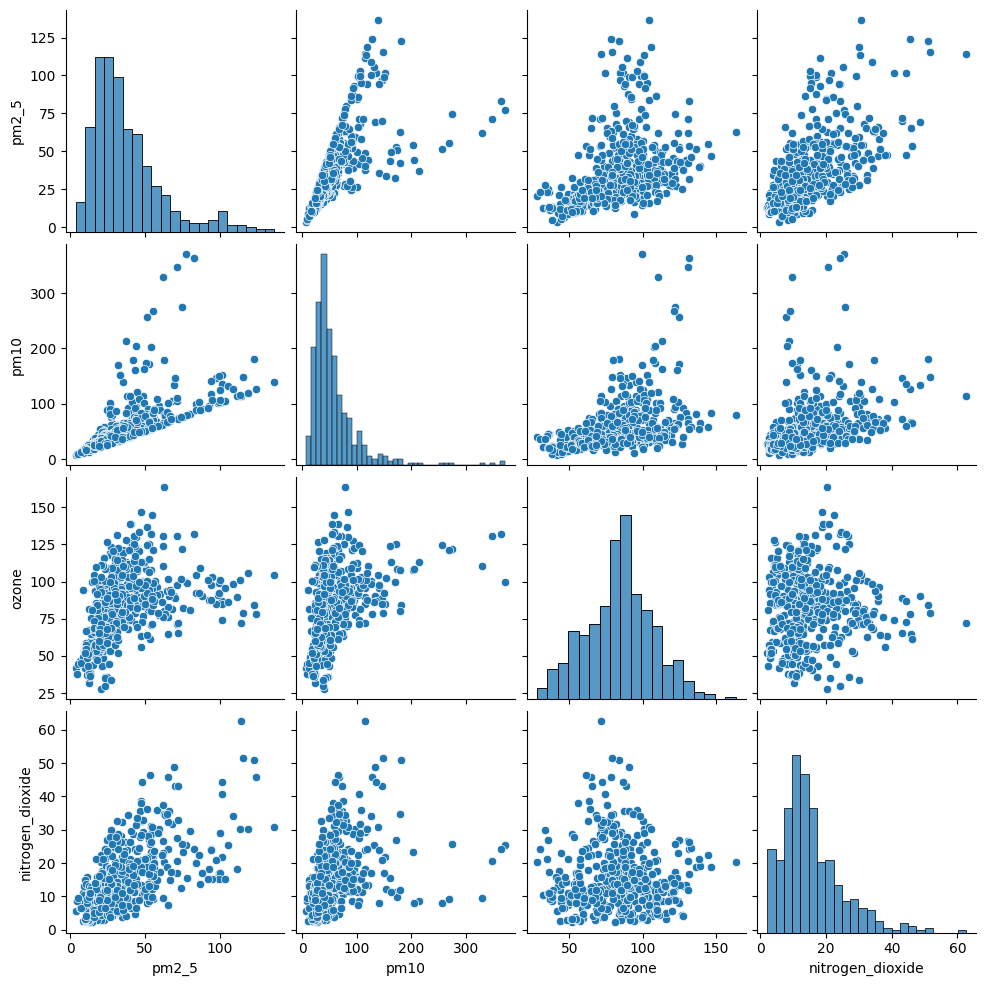

In [148]:
# Scatter Matrix of Key Pollutants

sns.pairplot(all_cities_df[["pm2_5","pm10","ozone","nitrogen_dioxide"]])
plt.show()